In [1]:
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
# Concatenate Numerical and Categorical dataframes into one dataframe called data.

In [3]:
numerical= pd.read_csv('numerical.csv')
categorical= pd.read_csv('categorical.csv')

In [4]:
data = pd.concat([categorical,numerical], axis = 1)
data

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy,...,vehicle_class,vehicle_size,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,2011-02,Employed,F,Suburban,Married,Corporate L3,...,Two-Door Car,Medsize,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,2011-01,Unemployed,F,Suburban,Single,Personal L3,...,Four-Door Car,Medsize,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,2011-02,Employed,F,Suburban,Married,Personal L3,...,Two-Door Car,Medsize,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,2011-01,Unemployed,M,Suburban,Married,Corporate L2,...,SUV,Medsize,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,2011-02,Employed,M,Rural,Single,Personal L1,...,Four-Door Car,Medsize,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02,Employed,M,Urban,Married,Personal L1,...,Four-Door Car,Medsize,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,Extended,College,2011-02,Employed,F,Suburban,Divorced,Corporate L3,...,Four-Door Car,Medsize,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,Extended,Bachelor,2011-02,Unemployed,M,Suburban,Single,Corporate L2,...,Four-Door Car,Medsize,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,Extended,College,2011-02,Employed,M,Suburban,Married,Personal L2,...,Four-Door Car,Large,7524.442436,21941,96,34,3,0,3,691.200000


#### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [5]:
y = data['total_claim_amount']
X = data.drop('total_claim_amount', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [7]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)

#### 3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [8]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num)
X_train_num_stand = transformer.transform(X_train_num)
X_test_num_stand = transformer.transform(X_test_num)
# pd.DataFrame(X_train_num_stand).head()

#### 4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

In [9]:
X_train_cat_OneHot = X_train_cat[['state','response','effective_to_date','employmentstatus', 'gender', 'marital_status','policy','renew_offer_type','sales_channel','vehicle_class','vehicle_size']]
X_test_cat_OneHot = X_test_cat[['state','response', 'effective_to_date','employmentstatus', 'gender', 'marital_status','policy','renew_offer_type','sales_channel','vehicle_class','vehicle_size']]

X_train_cat_ordinal = X_train_cat[['coverage', 'location_code', 'vehicle_size']]
X_test_cat_ordinal = X_test_cat[['coverage', 'location_code', 'vehicle_size']]

In [10]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat_OneHot)
X_train_cat_OneHot_encoded = encoder.transform(X_train_cat_OneHot).toarray()
X_test_cat_OneHot_encoded = encoder.transform(X_test_cat_OneHot).toarray()

In [11]:
X_train_cat_ordinal['coverage'] = X_train_cat_ordinal['coverage'].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
# X_train_cat_ordinal['employmentstatus'] = X_train_cat_ordinal['employmentstatus'].map({"Unemployed" : 0, "Disabled" : 0.25, "Retired" : 0.5, "Medical Leave" : 0.75, "Employed" : 1})
X_train_cat_ordinal['location_code'] = X_train_cat_ordinal['location_code'].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})
X_train_cat_ordinal['vehicle_size'] = X_train_cat_ordinal['vehicle_size'].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})
X_train_cat_ordinal= X_train_cat_ordinal.to_numpy()
# pd.DataFrame(X_train_cat_ordinal).head()

C:\Users\gorka\AppData\Local\Temp\ipykernel_6828\1918996805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal['coverage'] = X_train_cat_ordinal['coverage'].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
C:\Users\gorka\AppData\Local\Temp\ipykernel_6828\1918996805.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal['location_code'] = X_train_cat_ordinal['location_code'].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})
C:\Users\gorka\AppData\Local\Temp\ipykernel_

In [12]:
X_test_cat_ordinal['coverage'] = X_test_cat_ordinal['coverage'].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
# X_test_cat_ordinal['employmentstatus'] = X_test_cat_ordinal['employmentstatus'].map({"Unemployed" : 0, "Disabled" : 0.25, "Retired" : 0.5, "Medical Leave" : 0.75, "Employed" : 1})
X_test_cat_ordinal['location_code'] = X_test_cat_ordinal['location_code'].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})
X_test_cat_ordinal['vehicle_size'] = X_test_cat_ordinal['vehicle_size'].map({"Small" : 0, "Medsize" : 0.5, "Large" : 1})
X_test_cat_ordinal= X_test_cat_ordinal.to_numpy()
# pd.DataFrame(X_test_cat_ordinal).head()

C:\Users\gorka\AppData\Local\Temp\ipykernel_6828\4021922851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ordinal['coverage'] = X_test_cat_ordinal['coverage'].map({"Basic" : 0, "Extended" : 0.5, "Premium" : 1})
C:\Users\gorka\AppData\Local\Temp\ipykernel_6828\4021922851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ordinal['location_code'] = X_test_cat_ordinal['location_code'].map({"Rural" : 0, "Suburban" : 0.5, "Urban" : 1})
C:\Users\gorka\AppData\Local\Temp\ipykernel_6828

In [13]:
X_train_clean = np.concatenate([X_train_num_stand, X_train_cat_OneHot_encoded,X_train_cat_ordinal], axis=1) 
X_test_clean = np.concatenate([X_test_num_stand, X_test_cat_OneHot_encoded,X_test_cat_ordinal], axis=1) 

#### 5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [14]:
pd.DataFrame(X_train_clean).head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.020765,0.428441,0.118143,0.914286,1.000000,0.0,0.000,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1.0,0.5
1,0.239942,0.206719,0.535865,0.971429,0.545455,0.6,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0
2,0.039282,0.228903,0.016878,0.257143,0.818182,0.0,0.250,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0
3,1.000000,0.589692,0.717300,0.885714,0.747475,0.0,0.125,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.0
4,0.089659,0.315680,0.227848,0.400000,0.060606,0.0,0.250,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5


In [15]:
pd.DataFrame(X_test_clean).head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.011736,0.874716,0.042194,0.285714,0.464646,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5
1,0.011706,0.552845,0.042194,0.400000,0.353535,0.0,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5,0.5
2,0.016500,0.892130,0.084388,0.485714,0.525253,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.0,0.0
3,0.154892,0.414409,0.514768,0.685714,0.404040,0.0,1.000,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5
4,0.178996,0.228323,0.189873,0.314286,0.545455,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.5,0.5


#### 6. Try a simple linear regression with all the data to see whether we are getting good results.

In [16]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train_clean,y_train)

LinearRegression()

In [17]:
from sklearn.metrics import r2_score
lm_train_predictions = lm.predict(X_train_clean)
lm_train_r2 = r2_score(y_train, lm_train_predictions)
lm_train_r2

0.6180894751430538

In [18]:
lm_test_predictions = lm.predict(X_test_clean)
lm_test_r2 = r2_score(y_test, lm_test_predictions)
lm_test_r2

0.6572207707017352

#### 7., 8. and 9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code. Use the function to check  KNeighborsRegressor. You can check also the MLPRegressor for this task!

In [19]:
def models_train_test(k,lay1,lay2):

    # Linear Regression

    # Fitting and training the model
    lm = linear_model.LinearRegression()
    lm.fit(X_train_clean,y_train)
    # Predictions on TRAIN data and R2 score 
    lm_train_predictions = lm.predict(X_train_clean)
    lm_train_r2 = r2_score(y_train, lm_train_predictions)
    # Predictions on TEST data and R2 score
    lm_test_predictions = lm.predict(X_test_clean)
    lm_test_r2 = r2_score(y_test, lm_test_predictions)


    #KNeigbhours

    # Fitting and training the model
    knm = KNeighborsRegressor(n_neighbors=k)
    knm.fit(X_train_clean, y_train)
    # Predictions on TRAIN data and score 
    kn_train_score = knm.score(X_train_clean, y_train)
    # Predictions on TEST data and score
    kn_test_predictions = knm.predict(X_test_clean)
    kn_test_score = knm.score(X_test_clean, y_test)


    #MLP Regressor

    # Fitting and training the model
    mlp = MLPRegressor(hidden_layer_sizes=(lay1, lay2))
    mlp.fit(X_train_clean, y_train)

    # Predictions on TEST data and score
    mlp_test_predictions = mlp.predict(X_test_clean)
    mlp_test_score = r2_score(y_test,mlp_test_predictions)


    return lm_test_r2, kn_test_score, k, mlp_test_score


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
lm_test_r2, kn_test_score, k, mlp_test_score = models_train_test(8,50,50)
print("KNeighbour TEST score: {}(k set to {}).\nLinear Regression R2 TEST score: {}.\nMLP Regression R2 TEST score: {}".format(kn_test_score, k, lm_test_r2, mlp_test_score))

KNeighbour TEST score: 0.40598065831427943(k set to 8).
Linear Regression R2 TEST score: 0.6572207707017352.
MLP Regression R2 TEST score: 0.8299166759107734


C:\Users\gorka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 10. Check and discuss the results.

We can see that depending on the model the score changes a lot, so let's analyse them  one by one:
The Linear regression model has a more than decent result, although we should also look at other indicators like precision, recall and f1.(I tried to formulate them but I got an error.)

In the case of KNN, I have randomly chosen the neighbors, so I will calculate which one would be ideal and see if it improves the model.

In [21]:
%%time
scores = []
train =[]
for k in range(2,25):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_clean, y_train)
    scores.append(model.score(X_test_clean, y_test))
#     train.append(model.score(X_train_clean, y_train))

Wall time: 5.34 s


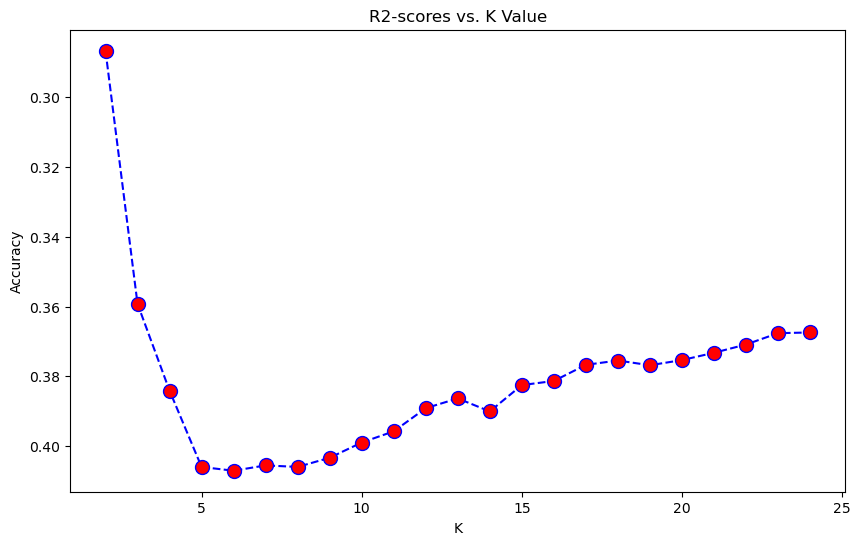

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(2,25),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
# plt.plot(range(2,25),train,color = 'red', linestyle='dashed',
#          marker='o', markerfacecolor='blue', markersize=10)
plt.title('R2-scores vs. K Value')
plt.gca().invert_yaxis()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [23]:
# Fitting and training the model with 7 neighbors
knm = KNeighborsRegressor(n_neighbors=7)
knm.fit(X_train_clean, y_train)
# Predictions on TRAIN data and score 
kn_train_score = knm.score(X_train_clean, y_train)
# Predictions on TEST data and score
kn_test_predictions = knm.predict(X_test_clean)
kn_test_score = knm.score(X_test_clean, y_test)
kn_test_score

0.4055409265672535

As can be observed, there is no latent improvement

Finally, this last model is the one that gives the best results, thanks to the fact that it performs more than one repetition until the best possible result is obtained. You could try changing the two values to try to get better results.

In [24]:
# Fitting and training the model
mlp = MLPRegressor(hidden_layer_sizes=(25, 50))
mlp.fit(X_train_clean, y_train)

# Predictions on TEST data and score
mlp_test_predictions = mlp.predict(X_test_clean)
mlp_test_score = r2_score(y_test,mlp_test_predictions)
mlp_test_score

C:\Users\gorka\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8337471306330964

It can be seen that changing the layers, significantly increases the score.